In [1]:
import pandas as pd
import numpy as np
import sqlite3

# Reconnect to the database
conn = sqlite3.connect('./ipl_database.db')
# Query the database
df_ball = pd.read_sql_query('SELECT * FROM ipl_ball_by_ball;', conn)

# Display the first few rows of the table
print(df_ball)

# Close the connection
conn.close()


             ID  innings  overs  ballnumber       batter          bowler   
0       1312200        1      0           1  YBK Jaiswal  Mohammed Shami  \
1       1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2       1312200        1      0           3   JC Buttler  Mohammed Shami   
3       1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4       1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
...         ...      ...    ...         ...          ...             ...   
225949   335982        2     14           5      P Kumar        I Sharma   
225950   335982        2     14           6     SB Joshi        I Sharma   
225951   335982        2     14           7      P Kumar        I Sharma   
225952   335982        2     15           1     SB Joshi       LR Shukla   
225953   335982        2     15           2     SB Joshi       LR Shukla   

        non-striker extra_type  batsman_run  extras_run  total_run   
0        JC Buttl

In [2]:
unique_batters = df_ball['batter'].unique().tolist()

print(unique_batters)

['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Ashwin', 'R Parag', 'TA Boult', 'OC McCoy', 'WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'JR Hazlewood', 'Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'PK Garg', 'Abhishek Sharma', 'RA Tripathi', 'AK Markram', 'N Pooran', 'Washington Sundar', 'R Shepherd', 'J Suchith', 'B Kumar', 'Umran Malik', 'JM Bairstow', 'S Dhawan', 'M Shahrukh Khan', 'MA Agarwal', 'LS Livingstone', 'JM Sharma', 'PN Mankad', 'PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant', 'SN Khan', 'R Powell', 'AR Patel', 'SN Thakur', 'Kuldeep Yadav', 'Ishan Kishan', 'RG Sharma', 'D Brevis', 'Tilak Varma', 'TH David', 'Ramandeep Singh', 'DR Sams', 'RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagadeesan', 'AT Rayudu', 'MS Dhoni', 'Simarjeet Singh', 'MJ Santner', 'R 

In [3]:
import sqlite3
import pandas as pd

def get_batting_stats(player_name):
    # Establish a connection to the SQLite database
    conn = sqlite3.connect('./ipl_database.db')

    # Define the SQL query with the corrected column name
    query = f'''
    SELECT
        innings,
        overs,
        SUM(CASE WHEN batter = ? THEN batsman_run ELSE 0 END) AS runs_scored,
        SUM((CASE WHEN isWicketDelivery = 1 AND player_out == ? THEN 1 ELSE 0 END)) AS Dismissals,
        COUNT(CASE WHEN (extra_type IS NULL OR extra_type = 'byes' OR extra_type = 'legbyes' OR extra_type = 'noballs') AND (batter = ?) THEN 1 ELSE NULL END) AS balls_faced,
        COUNT(CASE WHEN (extra_type IS NULL OR extra_type = 'byes' OR extra_type = 'legbyes' OR extra_type = 'noballs') AND (batter = ?) THEN 1 ELSE NULL END) AS balls_faced,
        COUNT(CASE WHEN (batsman_run = 6) AND (batter = ?) THEN 1 ELSE NULL END) AS Sixes,
        COUNT(CASE WHEN (batsman_run = 4) AND (batter = ?) THEN 1 ELSE NULL END) AS Fours
    FROM
        ipl_ball_by_ball
    WHERE
        batter = ? or "non-striker" = ?
    GROUP BY
        innings,
        overs
    ORDER BY
        innings,
        overs;
    '''

    # Execute the query with the player name as a parameter
    df = pd.read_sql_query(query, conn, params=(player_name, player_name, player_name, player_name, player_name, player_name, player_name, player_name))

    # Close the connection
    conn.close()
    df["Sixer_Percentage"] = df["Sixes"]*6/ df["runs_scored"]
    df["Four_Percentage"] = df["Fours"]*4/ df["runs_scored"]
    return df

# Example usage
player_name = 'AB de Villiers'  # Replace with the actual player name
batter_stats_df = get_batting_stats(player_name)
batter_stats_df

,innings,overs,runs_scored,Dismissals,balls_faced,Sixes,Fours,Sixer_Percentage,Four_Percentage
0,1,0,19,0,10,0,4,0.000000,0.842105
1,1,1,22,1,23,0,4,0.000000,0.727273
2,1,2,28,1,38,1,2,0.214286,0.285714
3,1,3,83,0,76,4,9,0.289157,0.433735
4,1,4,114,2,72,3,16,0.157895,0.561404
5,1,5,144,2,92,4,21,0.166667,0.583333
6,1,6,118,2,95,1,10,0.050847,0.338983
7,1,7,110,4,97,1,9,0.054545,0.327273
8,1,8,127,2,105,3,11,0.141732,0.346457
9,1,9,162,2,120,6,7,0.222222,0.172840


In [4]:
# Assuming you have a DataFrame named batter_stats_df
# Filter the DataFrame based on innings, overs range, and runs scored
innings_x = 1  # Specify the innings
overs_y = 6  # Specify the starting over
overs_z = 10  # Specify the ending over

filtered_batter_df = batter_stats_df[
    (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
    (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
    (batter_stats_df['overs'] <= overs_z)
]

# Print the filtered DataFrame
filtered_batter_df

,innings,overs,runs_scored,Dismissals,balls_faced,Sixes,Fours,Sixer_Percentage,Four_Percentage
6,1,6,118,2,95,1,10,0.050847,0.338983
7,1,7,110,4,97,1,9,0.054545,0.327273
8,1,8,127,2,105,3,11,0.141732,0.346457
9,1,9,162,2,120,6,7,0.222222,0.172840
10,1,10,172,5,134,7,10,0.244186,0.232558
26,2,6,93,5,95,0,7,0.000000,0.301075
27,2,7,111,3,99,3,6,0.162162,0.216216
28,2,8,133,4,113,4,11,0.180451,0.330827
29,2,9,133,3,106,6,8,0.270677,0.240602
30,2,10,136,4,103,7,9,0.308824,0.264706


In [5]:
def stat(player_name, batter_stats_df, overs_y, overs_z):
    # Assuming you have a DataFrame named batter_stats_df
    # Filter the DataFrame based on innings, overs range, and runs scored
     # Specify the ending over

    filtered_batter_df = batter_stats_df[
        (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (batter_stats_df['overs'] <= overs_z)
    ]

    print(filtered_batter_df)

    # Print the filtered DataFrame
    runs_score = filtered_batter_df["runs_scored"].sum()
    balls_faced = filtered_batter_df["balls_faced"].sum()
    dismissals = filtered_batter_df["Dismissals"].sum()
    average = runs_score/dismissals
    strike_rate = (runs_score/balls_faced)*100
    sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
    four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
    print(player_name)
    print(runs_score, balls_faced, dismissals, average, strike_rate)

    return [player_name, runs_score, balls_faced, dismissals, average, strike_rate, four_percentage, sixer_percentage]

stat("AB de Villiers", get_batting_stats("AB de Villiers"), 6, 10)

    innings  overs  runs_scored  Dismissals  balls_faced  Sixes  Fours   
6         1      6          118           2           95      1     10  \
7         1      7          110           4           97      1      9   
8         1      8          127           2          105      3     11   
9         1      9          162           2          120      6      7   
10        1     10          172           5          134      7     10   
26        2      6           93           5           95      0      7   
27        2      7          111           3           99      3      6   
28        2      8          133           4          113      4     11   
29        2      9          133           3          106      6      8   
30        2     10          136           4          103      7      9   

    Sixer_Percentage  Four_Percentage  
6           0.050847         0.338983  
7           0.054545         0.327273  
8           0.141732         0.346457  
9           0.222222     

['AB de Villiers',
 1295,
 1067,
 34,
 38.088235294117645,
 121.36832239925025,
 0.27181467181467184,
 0.17606177606177606]

In [6]:
runs_score = filtered_batter_df["runs_scored"].sum()
balls_faced = filtered_batter_df["balls_faced"].sum()
dismissals = filtered_batter_df["Dismissals"].sum()
average = runs_score/dismissals
strike_rate = (runs_score/balls_faced)*100
print(runs_score, balls_faced, dismissals, average, strike_rate)

1295 1067 34 38.088235294117645 121.36832239925025


In [7]:
def batting_stats_overs(player_name, batter_stats_df , overs_y, overs_z):

    filtered_batter_df = batter_stats_df[
        (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (batter_stats_df['overs'] <= overs_z)
    ]


    runs_score = filtered_batter_df["runs_scored"].sum()
    balls_faced = filtered_batter_df["balls_faced"].sum()
    dismissals = filtered_batter_df["Dismissals"].sum()
    sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
    four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
    average = runs_score/dismissals
    strike_rate = (runs_score/balls_faced)*100
    
    return [player_name, runs_score, balls_faced, dismissals, average, strike_rate, four_percentage, sixer_percentage]

# Best Batters in the Powerplay

In [8]:
batting_power_play = []
for i in unique_batters:
    df = get_batting_stats(i)
    batting_power_play.append(batting_stats_overs(i, df, 0, 5))

C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipy

In [9]:
batting_power_play

[['YBK Jaiswal',
  366,
  272,
  12,
  30.5,
  134.55882352941177,
  0.5245901639344263,
  0.22950819672131148],
 ['JC Buttler',
  1229,
  854,
  26,
  47.26923076923077,
  143.9110070257611,
  0.5109845402766476,
  0.26851098454027666],
 ['SV Samson',
  999,
  849,
  35,
  28.542857142857144,
  117.6678445229682,
  0.4844844844844845,
  0.18018018018018017],
 ['D Padikkal',
  631,
  512,
  19,
  33.21052631578947,
  123.2421875,
  0.5388272583201268,
  0.12361331220285261],
 ['SO Hetmyer',
  53,
  51,
  2,
  26.5,
  103.921568627451,
  0.4528301886792453,
  0.22641509433962265],
 ['R Ashwin',
  58,
  56,
  4,
  14.5,
  103.57142857142858,
  0.6206896551724138,
  0.20689655172413793],
 ['R Parag', 0, 11, 1, 0.0, 0.0, nan, nan],
 ['TA Boult', 0, 0, 0, nan, nan, nan, nan],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  972,
  727,
  35,
  27.771428571428572,
  133.70013755158183,
  0.551440329218107,
  0.18518518518518517],
 ['Shubman Gill',
  882,
  729,
  22,
  40.090909090

In [10]:
batting_power_play_df = pd.DataFrame(batting_power_play, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_power_play_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,366,272,12,30.500000,134.558824,0.524590,0.229508
1,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511
2,SV Samson,999,849,35,28.542857,117.667845,0.484484,0.180180
3,D Padikkal,631,512,19,33.210526,123.242188,0.538827,0.123613
4,SO Hetmyer,53,51,2,26.500000,103.921569,0.452830,0.226415
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,0,0,0,NaN,NaN,NaN,NaN
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,4,3,0,inf,133.333333,1.000000,0.000000


In [11]:
sorted_batting_powerplay_df = batting_power_play_df.sort_values('runs', ascending=False)
filtered_sorted_batting_powerplay_df = sorted_batting_powerplay_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_powerplay_df))
filtered_sorted_batting_powerplay_df

54


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
43,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938
50,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647
189,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568
280,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592
14,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412
101,AM Rahane,2049,1783,65,31.523077,114.918676,0.532943,0.108346
105,RV Uthappa,2035,1636,62,32.822581,124.388753,0.513022,0.147420
242,PA Patel,1904,1565,73,26.082192,121.661342,0.594538,0.097689
59,RG Sharma,1632,1389,55,29.672727,117.494600,0.460784,0.231618
24,Q de Kock,1631,1248,45,36.244444,130.689103,0.446352,0.239117


In [12]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_powerplay_df = filtered_sorted_batting_powerplay_df.reset_index(drop=True)
len(filtered_sorted_batting_powerplay_df)

54

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
data = filtered_sorted_batting_powerplay_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage']])

# Create and train the neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.fit(X, X, epochs=100, batch_size=32, verbose=0)

# Inspect the model's summary to find the correct layer name
model.summary()

encoder = tf.keras.Model(model.input, model.layers[-2].output)
print(encoder)
encoded_data = encoder.predict(X)
print("encoder data")
print(encoded_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original data
data['Cluster'] = labels





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)              

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
type(encoded_data)

numpy.ndarray

In [15]:
encoded_data.shape

(54, 8)

In [16]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938,2
41,SP Narine,665,383,36,18.472222,173.629243,0.517293,0.342857,2
33,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,2
19,DR Smith,1213,976,27,44.925926,124.282787,0.511129,0.232481,2
18,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511,2
36,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,2
38,JM Bairstow,695,470,14,49.642857,147.872340,0.506475,0.258993,2
11,V Sehwag,1593,1105,61,26.114754,144.162896,0.577527,0.173258,2
40,Ishan Kishan,679,551,12,56.583333,123.230490,0.518409,0.194404,2
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,2


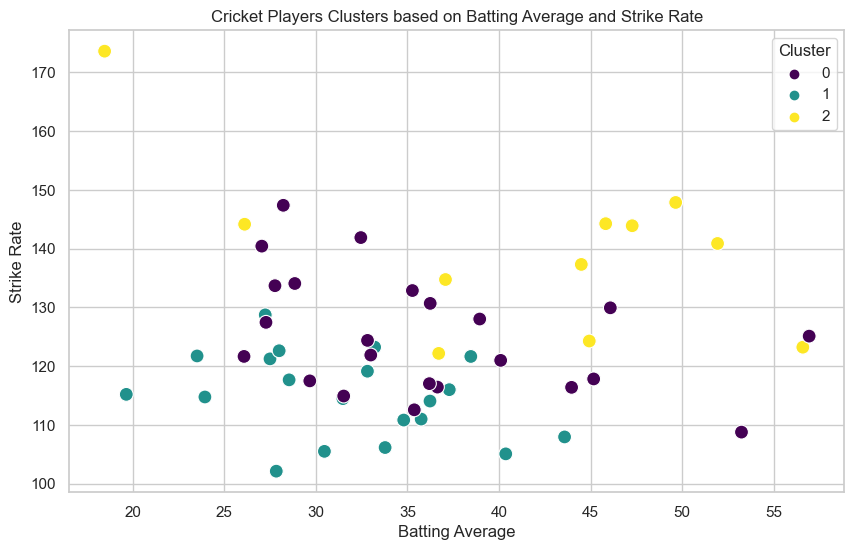

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans

# Assuming 'filtered_sorted_batting_powerplay_df' is your DataFrame
data = filtered_sorted_batting_powerplay_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage']])

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5
input_data = Input(shape=(input_shape,))

# Build the autoencoder model
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_shape, activation='linear')(decoded)  # Output layer with same size as input

autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(X, X,
                          epochs=100,
                          batch_size=32,
                          shuffle=True,
                          verbose=0,
                          validation_split=0.2)  # Add validation split for model evaluation

# Encode the data using the trained encoder
encoded_data = encoder.predict(X)

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Add the cluster labels back to the original DataFrame
data['Cluster'] = labels

2/2 [==============================] - 0s 2ms/step


c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
41,SP Narine,665,383,36,18.472222,173.629243,0.517293,0.342857,2
36,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,2
50,KC Sangakkara,522,450,14,37.285714,116.000000,0.620690,0.068966,2
28,R Dravid,905,832,17,53.235294,108.774038,0.654144,0.046409,2
21,SR Tendulkar,1143,982,26,43.961538,116.395112,0.612423,0.052493,2
44,DPMD Jayawardene,605,499,22,27.500000,121.242485,0.614876,0.119008,2
33,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,1
35,SE Marsh,767,730,19,40.368421,105.068493,0.599739,0.062581,1
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,1
26,WP Saha,972,727,35,27.771429,133.700138,0.551440,0.185185,1


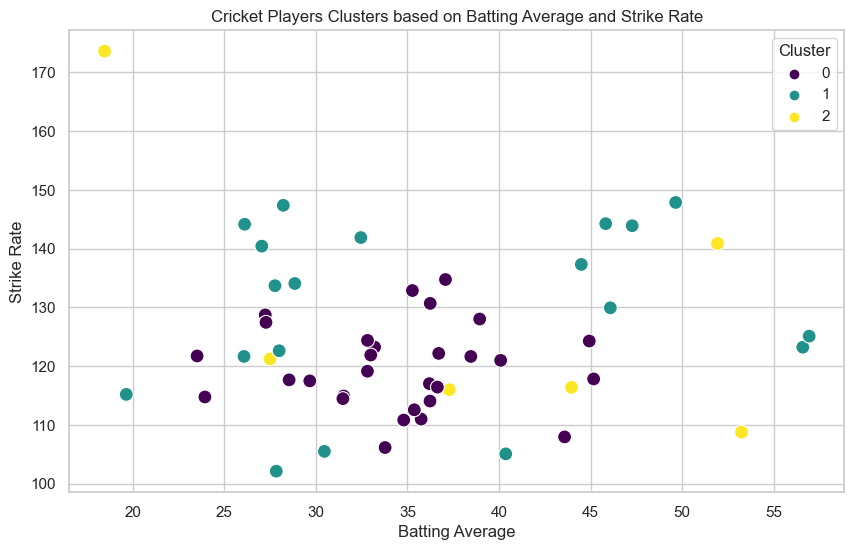

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'filtered_sorted_batting_powerplay_df' is your DataFrame
data = filtered_sorted_batting_powerplay_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.0273790955543518
Epoch 2, Loss: 1.048226535320282
Epoch 3, Loss: 1.0203244388103485
Epoch 4, Loss: 1.0335498750209808
Epoch 5, Loss: 1.007872998714447
Epoch 6, Loss: 1.0354703962802887
Epoch 7, Loss: 1.0469500422477722
Epoch 8, Loss: 0.9421921372413635
Epoch 9, Loss: 0.9991759955883026
Epoch 10, Loss: 1.0330283343791962
Epoch 11, Loss: 0.9838778972625732
Epoch 12, Loss: 0.9940710365772247
Epoch 13, Loss: 0.9694807231426239
Epoch 14, Loss: 0.9582355916500092
Epoch 15, Loss: 0.9904192388057709
Epoch 16, Loss: 1.029455989599228
Epoch 17, Loss: 0.9759465157985687
Epoch 18, Loss: 0.9991156756877899
Epoch 19, Loss: 0.9440285265445709
Epoch 20, Loss: 0.9814202785491943
Epoch 21, Loss: 0.9433067440986633
Epoch 22, Loss: 0.9847908318042755
Epoch 23, Loss: 0.9450480341911316
Epoch 24, Loss: 0.9461067020893097
Epoch 25, Loss: 0.9631311297416687
Epoch 26, Loss: 0.9981396496295929
Epoch 27, Loss: 0.9180984497070312
Epoch 28, Loss: 0.9735114872455597
Epoch 29, Loss: 0.91307777166366

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
filtered_sorted_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568
3,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592
4,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412
5,AM Rahane,2049,1783,65,31.523077,114.918676,0.532943,0.108346
6,RV Uthappa,2035,1636,62,32.822581,124.388753,0.513022,0.147420
7,PA Patel,1904,1565,73,26.082192,121.661342,0.594538,0.097689
8,RG Sharma,1632,1389,55,29.672727,117.494600,0.460784,0.231618
9,Q de Kock,1631,1248,45,36.244444,130.689103,0.446352,0.239117


In [23]:
combined_data = pd.concat([filtered_sorted_batting_powerplay_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938,0
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,0
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,0
3,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592,0
4,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412,0


In [24]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
27,AJ Finch,910,793,38,23.947368,114.754098,0.527473,0.164835,2
43,Mandeep Singh,629,546,32,19.656250,115.201465,0.597774,0.076312,2
26,WP Saha,972,727,35,27.771429,133.700138,0.551440,0.185185,2
25,SV Samson,999,849,35,28.542857,117.667845,0.484484,0.180180,2
22,PP Shaw,1129,766,40,28.225000,147.389034,0.549159,0.186005,2
37,AB de Villiers,722,606,22,32.818182,119.141914,0.548476,0.149584,2
20,MA Agarwal,1176,966,50,23.520000,121.739130,0.465986,0.193878,2
39,M Vohra,681,529,25,27.240000,128.733459,0.422907,0.237885,2
17,AC Gilchrist,1385,1033,48,28.854167,134.075508,0.551625,0.212274,2
42,D Padikkal,631,512,19,33.210526,123.242188,0.538827,0.123613,2


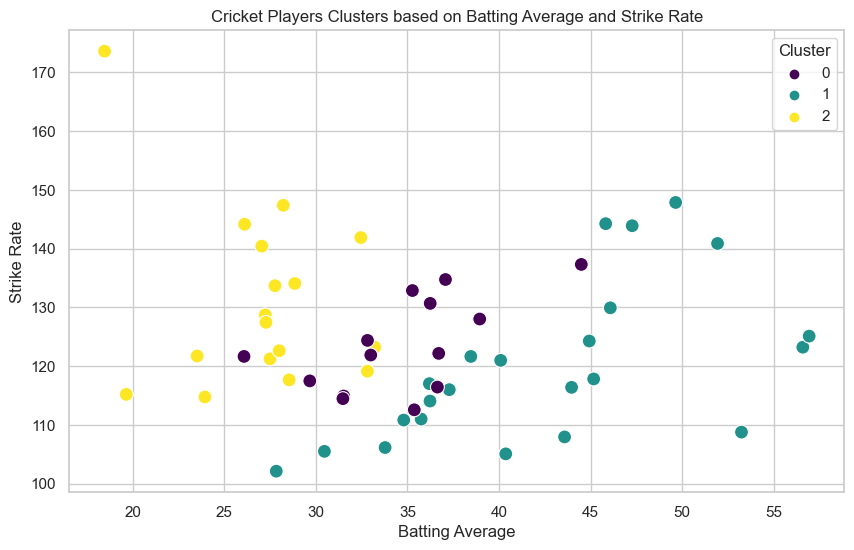

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_powerplay_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_powerplay_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.6

# Create a new column for the composite score
filtered_sorted_batting_powerplay_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_powerplay_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100

2/2 [==============================] - 1s 5ms/step - loss: 0.6963 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy:

In [27]:
predictions

array([[0.3410238 ],
       [0.31023908],
       [0.41832024],
       [0.30394614],
       [0.26786318],
       [0.53551143],
       [0.4741721 ],
       [0.69999415],
       [0.24246304],
       [0.4834632 ],
       [0.7363298 ]], dtype=float32)

In [28]:
len(predictions)

11

In [29]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 2ms/step
[[0.19973384]
 [0.17458136]
 [0.39388898]
 [0.26786318]
 [0.53551143]
 [0.3264169 ]
 [0.2552335 ]
 [0.32975376]
 [0.43091673]
 [0.36273536]
 [0.36146426]
 [0.602273  ]
 [0.49309754]
 [0.27090603]
 [0.28584194]
 [0.4392892 ]
 [0.5275959 ]
 [0.347741  ]
 [0.4834632 ]
 [0.78917426]
 [0.16242915]
 [0.6868876 ]
 [0.3529892 ]
 [0.770358  ]
 [0.31023908]
 [0.37837622]
 [0.60987633]
 [0.24246304]
 [0.7295804 ]
 [0.27973855]
 [0.41832024]
 [0.30402315]
 [0.5206226 ]
 [0.2082502 ]
 [0.34222132]
 [0.4741721 ]
 [0.5665225 ]
 [0.75679195]
 [0.45136306]
 [0.7363298 ]
 [0.3186907 ]
 [0.5828471 ]
 [0.4217835 ]
 [0.41227415]
 [0.3410238 ]
 [0.4303049 ]
 [0.51935   ]
 [0.3129674 ]
 [0.51649106]
 [0.30394614]
 [0.5224998 ]
 [0.32659855]
 [0.69999415]
 [0.5030386 ]]


In [30]:
len(output_players_performance)

54

In [31]:
filtered_sorted_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,AJ Finch,910,793,38,23.947368,114.754098,0.527473,0.164835,2,0.192600
1,Mandeep Singh,629,546,32,19.656250,115.201465,0.597774,0.076312,2,0.129986
2,WP Saha,972,727,35,27.771429,133.700138,0.551440,0.185185,2,0.403628
3,SV Samson,999,849,35,28.542857,117.667845,0.484484,0.180180,2,0.280148
4,PP Shaw,1129,766,40,28.225000,147.389034,0.549159,0.186005,2,0.530297
5,AB de Villiers,722,606,22,32.818182,119.141914,0.548476,0.149584,2,0.337678
6,MA Agarwal,1176,966,50,23.520000,121.739130,0.465986,0.193878,2,0.255665
7,M Vohra,681,529,25,27.240000,128.733459,0.422907,0.237885,2,0.344091
8,AC Gilchrist,1385,1033,48,28.854167,134.075508,0.551625,0.212274,2,0.436399
9,D Padikkal,631,512,19,33.210526,123.242188,0.538827,0.123613,2,0.373759


# Best Batters In the Powerplay

In [32]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Predicted Performance'])

# Concatenate the two dataframes along the column axis
merged_batting_powerplay_df = pd.concat([filtered_sorted_batting_powerplay_df, performance_df], axis=1)
merged_batting_powerplay_df = merged_batting_powerplay_df.sort_values('Predicted Performance', ascending=False)
merged_batting_powerplay_df = merged_batting_powerplay_df.reset_index(drop=True)
merged_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Predicted Performance
0,JM Bairstow,695,470,14,49.642857,147.872340,0.506475,0.258993,1,0.796487,0.789174
1,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,1,0.768834,0.770358
2,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511,1,0.752485,0.756792
3,KL Rahul,1594,1274,28,56.928571,125.117739,0.431619,0.233375,1,0.734117,0.736330
4,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,1,0.719674,0.729580
5,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,0,0.723681,0.699994
6,Ishan Kishan,679,551,12,56.583333,123.230490,0.518409,0.194404,1,0.679355,0.686888
7,ML Hayden,599,461,13,46.076923,129.934924,0.540902,0.200334,1,0.595999,0.609876
8,SP Narine,665,383,36,18.472222,173.629243,0.517293,0.342857,2,0.606210,0.602273
9,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,0,0.586194,0.582847


# Batting Middle Overs Part 1

In [33]:
batting_middle_one = []
for i in unique_batters:
    batting_middle_one.append(batting_stats_overs(i, get_batting_stats(i), 6, 10))

C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:1

In [34]:
batting_stats_overs("AB de Villiers", get_batting_stats("AB de Villiers") , 6, 10)

['AB de Villiers',
 1295,
 1067,
 34,
 38.088235294117645,
 121.36832239925025,
 0.27181467181467184,
 0.17606177606177606]

In [35]:
batting_middle_one

[['YBK Jaiswal',
  134,
  97,
  6,
  22.333333333333332,
  138.1443298969072,
  0.26865671641791045,
  0.31343283582089554],
 ['JC Buttler',
  658,
  493,
  14,
  47.0,
  133.46855983772818,
  0.3100303951367781,
  0.20972644376899696],
 ['SV Samson',
  1209,
  901,
  34,
  35.55882352941177,
  134.18423973362928,
  0.23159636062861869,
  0.28287841191067],
 ['D Padikkal',
  334,
  280,
  8,
  41.75,
  119.28571428571428,
  0.2874251497005988,
  0.2155688622754491],
 ['SO Hetmyer',
  49,
  47,
  3,
  16.333333333333332,
  104.25531914893618,
  0.08163265306122448,
  0.3673469387755102],
 ['R Ashwin', 33, 39, 1, 33.0, 84.61538461538461, 0.12121212121212122, 0.0],
 ['R Parag',
  71,
  78,
  2,
  35.5,
  91.02564102564102,
  0.39436619718309857,
  0.08450704225352113],
 ['TA Boult', 0, 0, 0, nan, nan, nan, nan],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  428,
  460,
  20,
  21.4,
  93.04347826086956,
  0.2803738317757009,
  0.04205607476635514],
 ['Shubman Gill',
  479,
  

In [36]:
batting_middle_one_df = pd.DataFrame(batting_middle_one, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,134,97,6,22.333333,138.144330,0.268657,0.313433
1,JC Buttler,658,493,14,47.000000,133.468560,0.310030,0.209726
2,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878
3,D Padikkal,334,280,8,41.750000,119.285714,0.287425,0.215569
4,SO Hetmyer,49,47,3,16.333333,104.255319,0.081633,0.367347
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,0,0,0,NaN,NaN,NaN,NaN
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,14,13,1,14.000000,107.692308,0.571429,0.000000


In [37]:
sorted_batting_middle_one_df = batting_middle_one_df.sort_values('runs', ascending=False)
filtered_sorted_batting_middle_one_df = sorted_batting_middle_one_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_middle_one_df))
filtered_sorted_batting_middle_one_df = filtered_sorted_batting_middle_one_df.reset_index(drop=True)

45


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_middle_one_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.1185544729232788
Epoch 2, Loss: 0.9464459717273712
Epoch 3, Loss: 1.0014172494411469
Epoch 4, Loss: 1.0396466255187988
Epoch 5, Loss: 1.0162761509418488
Epoch 6, Loss: 0.9813657402992249
Epoch 7, Loss: 0.9703966677188873
Epoch 8, Loss: 1.0188019275665283
Epoch 9, Loss: 1.0649167597293854
Epoch 10, Loss: 0.8989801108837128
Epoch 11, Loss: 1.0325334966182709
Epoch 12, Loss: 1.1052643060684204
Epoch 13, Loss: 1.0338087677955627
Epoch 14, Loss: 0.9588870406150818
Epoch 15, Loss: 1.0064603388309479
Epoch 16, Loss: 0.9136444628238678
Epoch 17, Loss: 0.9283933043479919
Epoch 18, Loss: 0.8439716696739197
Epoch 19, Loss: 1.0078618824481964
Epoch 20, Loss: 1.0363314151763916
Epoch 21, Loss: 0.8128775060176849
Epoch 22, Loss: 0.9436828196048737
Epoch 23, Loss: 0.9186590015888214
Epoch 24, Loss: 0.926721602678299
Epoch 25, Loss: 0.8878602385520935
Epoch 26, Loss: 0.8372936546802521
Epoch 27, Loss: 0.8873898088932037
Epoch 28, Loss: 0.8680956959724426
Epoch 29, Loss: 0.852124154567

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917
1,SK Raina,1786,1460,48,37.208333,122.328767,0.320269,0.174692
2,S Dhawan,1624,1351,43,37.767442,120.207254,0.349754,0.103448
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264
4,RV Uthappa,1462,1214,55,26.581818,120.428336,0.309166,0.217510
5,RG Sharma,1420,1336,54,26.296296,106.287425,0.273239,0.160563
6,AB de Villiers,1295,1067,34,38.088235,121.368322,0.271815,0.176062
7,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658
8,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878
9,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244


In [40]:
combined_data = pd.concat([filtered_sorted_batting_middle_one_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917,1
1,SK Raina,1786,1460,48,37.208333,122.328767,0.320269,0.174692,1
2,S Dhawan,1624,1351,43,37.767442,120.207254,0.349754,0.103448,1
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264,1
4,RV Uthappa,1462,1214,55,26.581818,120.428336,0.309166,0.217510,1


In [41]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
44,AC Gilchrist,504,347,20,25.200000,145.244957,0.253968,0.404762,2
32,MA Agarwal,642,457,29,22.137931,140.481400,0.292835,0.271028,2
17,RR Pant,913,678,15,60.866667,134.660767,0.324206,0.230011,2
24,V Sehwag,749,449,20,37.450000,166.815145,0.357810,0.296395,2
29,DR Smith,670,477,29,23.103448,140.461216,0.316418,0.340299,2
18,SE Marsh,856,604,14,61.142857,141.721854,0.406542,0.189252,2
36,MS Dhoni,608,667,13,46.769231,91.154423,0.276316,0.148026,1
35,KC Sangakkara,621,543,19,32.684211,114.364641,0.380032,0.077295,1
33,SR Tendulkar,640,574,24,26.666667,111.498258,0.368750,0.075000,1
38,JH Kallis,598,651,20,29.900000,91.858679,0.254181,0.060201,1


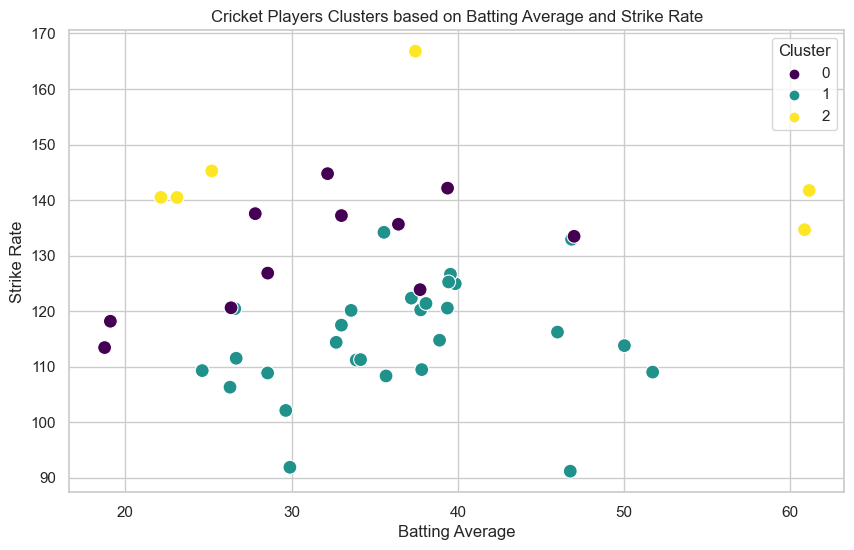

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [43]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_middle_one_df = filtered_sorted_batting_middle_one_df.reset_index(drop=True)
len(filtered_sorted_batting_middle_one_df)

45

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_middle_one_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_middle_one_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.6

# Create a new column for the composite score
filtered_sorted_batting_middle_one_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_middle_one_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 0.6899 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6869 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 

In [45]:
predictions

array([[0.41764966],
       [0.26113626],
       [0.5575887 ],
       [0.5628992 ],
       [0.26828802],
       [0.55914724],
       [0.40986392],
       [0.4294458 ],
       [0.5489613 ]], dtype=float32)

In [46]:
len(predictions)

9

In [47]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 4ms/step
[[0.48672247]
 [0.41327202]
 [0.84431857]
 [0.80474544]
 [0.43079704]
 [0.87165695]
 [0.3672962 ]
 [0.3580028 ]
 [0.26942983]
 [0.26113626]
 [0.45242646]
 [0.3493025 ]
 [0.26828802]
 [0.27413213]
 [0.5575887 ]
 [0.5628992 ]
 [0.55914724]
 [0.42944583]
 [0.5489612 ]
 [0.6627871 ]
 [0.3619536 ]
 [0.41764966]
 [0.5431058 ]
 [0.74754566]
 [0.3795556 ]
 [0.27160907]
 [0.5328045 ]
 [0.51635504]
 [0.599531  ]
 [0.38224   ]
 [0.25418332]
 [0.41161755]
 [0.57615644]
 [0.5564111 ]
 [0.6407679 ]
 [0.7082123 ]
 [0.40986392]
 [0.71178585]
 [0.5563574 ]
 [0.3294449 ]
 [0.2393965 ]
 [0.24552101]
 [0.4914918 ]
 [0.51217073]
 [0.57502866]]


In [48]:
len(output_players_performance)

45

In [49]:
filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,AC Gilchrist,504,347,20,25.200000,145.244957,0.253968,0.404762,2,0.505020
1,MA Agarwal,642,457,29,22.137931,140.481400,0.292835,0.271028,2,0.441768
2,RR Pant,913,678,15,60.866667,134.660767,0.324206,0.230011,2,0.873288
3,V Sehwag,749,449,20,37.450000,166.815145,0.357810,0.296395,2,0.839446
4,DR Smith,670,477,29,23.103448,140.461216,0.316418,0.340299,2,0.455155
5,SE Marsh,856,604,14,61.142857,141.721854,0.406542,0.189252,2,0.928146
6,MS Dhoni,608,667,13,46.769231,91.154423,0.276316,0.148026,1,0.338490
7,KC Sangakkara,621,543,19,32.684211,114.364641,0.380032,0.077295,1,0.357427
8,SR Tendulkar,640,574,24,26.666667,111.498258,0.368750,0.075000,1,0.265188
9,JH Kallis,598,651,20,29.900000,91.858679,0.254181,0.060201,1,0.144340


# Best Batters In the Middle Part 1

In [50]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_middle_one_df = pd.concat([filtered_sorted_batting_middle_one_df, performance_df], axis=1)
merged_filtered_sorted_batting_middle_one_df = merged_filtered_sorted_batting_middle_one_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_middle_one_df = merged_filtered_sorted_batting_middle_one_df.reset_index(drop=True)
merged_filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,SE Marsh,856,604,14,61.142857,141.721854,0.406542,0.189252,2,0.928146,0.871657
1,RR Pant,913,678,15,60.866667,134.660767,0.324206,0.230011,2,0.873288,0.844319
2,V Sehwag,749,449,20,37.450000,166.815145,0.357810,0.296395,2,0.839446,0.804745
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264,1,0.743048,0.747546
4,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658,0,0.703023,0.711786
5,JC Buttler,658,493,14,47.000000,133.468560,0.310030,0.209726,0,0.680623,0.708212
6,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917,1,0.648259,0.662787
7,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244,0,0.633686,0.640768
8,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878,1,0.593839,0.599531
9,KL Rahul,989,781,25,39.560000,126.632522,0.250758,0.218402,1,0.564183,0.576156


# Batting Middle Overs Part 2

In [51]:
batting_middle_two = []
for i in unique_batters:
    batting_middle_two.append(batting_stats_overs(i, get_batting_stats(i), 11, 15))

C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: divide by zero encou

In [52]:
batting_middle_two

[['YBK Jaiswal',
  47,
  37,
  5,
  9.4,
  127.02702702702702,
  0.425531914893617,
  0.1276595744680851],
 ['JC Buttler',
  616,
  381,
  19,
  32.421052631578945,
  161.67979002624674,
  0.2922077922077922,
  0.33116883116883117],
 ['SV Samson',
  880,
  621,
  29,
  30.344827586206897,
  141.70692431561997,
  0.2636363636363636,
  0.26590909090909093],
 ['D Padikkal',
  265,
  193,
  11,
  24.09090909090909,
  137.30569948186528,
  0.3471698113207547,
  0.2490566037735849],
 ['SO Hetmyer',
  298,
  232,
  8,
  37.25,
  128.44827586206898,
  0.3087248322147651,
  0.24161073825503357],
 ['R Ashwin',
  175,
  167,
  9,
  19.444444444444443,
  104.79041916167664,
  0.2057142857142857,
  0.2057142857142857],
 ['R Parag',
  196,
  165,
  7,
  28.0,
  118.7878787878788,
  0.2857142857142857,
  0.21428571428571427],
 ['TA Boult', 2, 6, 1, 2.0, 33.33333333333333, 0.0, 0.0],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  586,
  430,
  17,
  34.470588235294116,
  136.27906976744185

In [53]:
batting_middle_two_df = pd.DataFrame(batting_middle_two, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,47,37,5,9.400000,127.027027,0.425532,0.127660
1,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169
2,SV Samson,880,621,29,30.344828,141.706924,0.263636,0.265909
3,D Padikkal,265,193,11,24.090909,137.305699,0.347170,0.249057
4,SO Hetmyer,298,232,8,37.250000,128.448276,0.308725,0.241611
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,12,9,1,12.000000,133.333333,0.000000,0.500000
602,SB Joshi,6,14,2,3.000000,42.857143,0.000000,0.000000
603,DS Lehmann,0,2,1,0.000000,0.000000,NaN,NaN


In [54]:
sorted_batting_middle_two_df = batting_middle_two_df.sort_values('runs', ascending=False)
filtered_sorted_batting_middle_two_df = sorted_batting_middle_two_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_middle_two_df))
filtered_sorted_batting_middle_two_df

43


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
70,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871
176,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863
14,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501
59,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165
19,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038
179,SK Raina,1526,1026,54,28.259259,148.732943,0.290957,0.263434
69,AT Rayudu,1467,1047,48,30.562500,140.114613,0.289025,0.298569
116,KA Pollard,1366,1033,34,40.176471,132.236205,0.240117,0.360176
262,Yuvraj Singh,1278,931,43,29.720930,137.271751,0.294210,0.328638
241,YK Pathan,1206,847,44,27.409091,142.384888,0.262023,0.348259


In [55]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_middle_two_df = filtered_sorted_batting_middle_two_df.reset_index(drop=True)
len(filtered_sorted_batting_middle_two_df)

43

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_middle_two_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 0.9507121443748474
Epoch 2, Loss: 1.107321709394455
Epoch 3, Loss: 0.9855220913887024
Epoch 4, Loss: 1.0164330899715424
Epoch 5, Loss: 1.004542738199234
Epoch 6, Loss: 0.8767773807048798
Epoch 7, Loss: 1.1001000106334686
Epoch 8, Loss: 0.8737204968929291
Epoch 9, Loss: 1.1051115989685059
Epoch 10, Loss: 1.0686261355876923
Epoch 11, Loss: 0.9494629800319672
Epoch 12, Loss: 0.9861940443515778
Epoch 13, Loss: 1.0506584644317627
Epoch 14, Loss: 1.1039603054523468
Epoch 15, Loss: 0.8777752816677094
Epoch 16, Loss: 1.064209669828415
Epoch 17, Loss: 0.8672521412372589
Epoch 18, Loss: 0.8887925446033478
Epoch 19, Loss: 0.984977126121521
Epoch 20, Loss: 1.0340442657470703
Epoch 21, Loss: 0.8693542778491974
Epoch 22, Loss: 0.8981453776359558
Epoch 23, Loss: 1.0258603692054749
Epoch 24, Loss: 0.9495329260826111
Epoch 25, Loss: 0.8935815989971161
Epoch 26, Loss: 0.8361863195896149
Epoch 27, Loss: 0.8588866591453552
Epoch 28, Loss: 0.9543510377407074
Epoch 29, Loss: 0.787378311157226

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863
2,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501
3,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165
4,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038
5,SK Raina,1526,1026,54,28.259259,148.732943,0.290957,0.263434
6,AT Rayudu,1467,1047,48,30.562500,140.114613,0.289025,0.298569
7,KA Pollard,1366,1033,34,40.176471,132.236205,0.240117,0.360176
8,Yuvraj Singh,1278,931,43,29.720930,137.271751,0.294210,0.328638
9,YK Pathan,1206,847,44,27.409091,142.384888,0.262023,0.348259


In [58]:
combined_data = pd.concat([filtered_sorted_batting_middle_two_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871,0
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863,0
2,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501,0
3,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165,0
4,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038,0


In [59]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
21,GJ Maxwell,848,492,30,28.266667,172.357724,0.287736,0.424528,2
11,DA Warner,1044,699,28,37.285714,149.356223,0.283525,0.241379,2
23,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,2
31,SE Marsh,684,427,21,32.571429,160.187354,0.327485,0.289474,2
32,N Rana,652,413,20,32.600000,157.869249,0.251534,0.404908,2
33,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169,2
19,AD Russell,893,559,26,34.346154,159.749553,0.241881,0.510638,2
16,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,2
15,SR Watson,1006,593,31,32.451613,169.645868,0.349901,0.339960,2
14,S Dhawan,1026,739,39,26.307692,138.836265,0.393762,0.140351,2


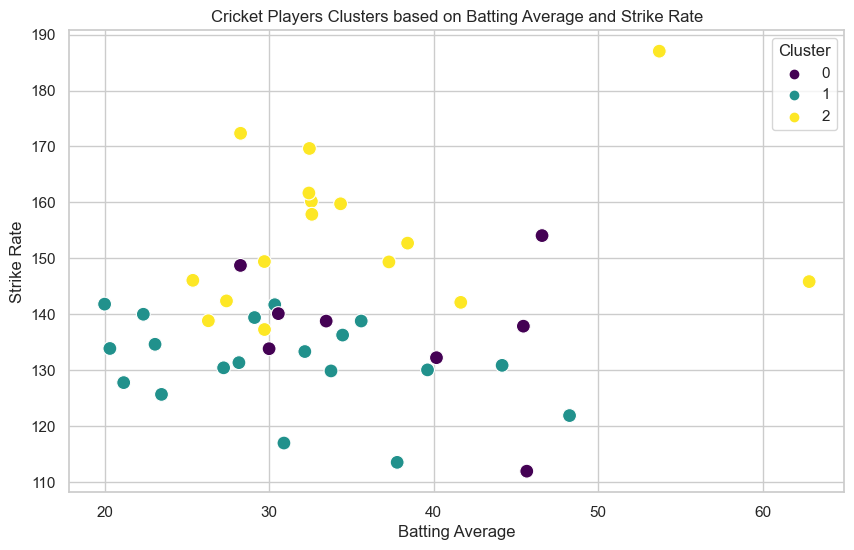

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_middle_two_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_middle_two_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.7

# Create a new column for the composite score
filtered_sorted_batting_middle_two_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_middle_two_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 

In [62]:
predictions

array([[0.6101201 ],
       [0.36984897],
       [0.53002256],
       [0.23097672],
       [0.44152543],
       [0.4388007 ],
       [0.4097662 ],
       [0.4882054 ],
       [0.6829598 ]], dtype=float32)

In [63]:
len(predictions)

9

In [64]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 1ms/step
[[0.7009534 ]
 [0.6108491 ]
 [0.6829598 ]
 [0.6209095 ]
 [0.59520006]
 [0.61760855]
 [0.66417456]
 [0.88818806]
 [0.73347867]
 [0.38356557]
 [0.44412452]
 [0.53002256]
 [0.58144706]
 [0.4388007 ]
 [0.42228013]
 [0.6109177 ]
 [0.4430267 ]
 [0.32039198]
 [0.30703026]
 [0.39091384]
 [0.2531056 ]
 [0.2301064 ]
 [0.4097662 ]
 [0.2312634 ]
 [0.23097672]
 [0.28458866]
 [0.3264204 ]
 [0.28047928]
 [0.36984897]
 [0.35779163]
 [0.3969398 ]
 [0.39111093]
 [0.44152543]
 [0.3072043 ]
 [0.24256876]
 [0.7611278 ]
 [0.48440465]
 [0.462485  ]
 [0.51666135]
 [0.40540767]
 [0.6101201 ]
 [0.4882054 ]
 [0.38156256]]


In [65]:
len(output_players_performance)

43

In [66]:
filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,GJ Maxwell,848,492,30,28.266667,172.357724,0.287736,0.424528,2,0.686403
1,DA Warner,1044,699,28,37.285714,149.356223,0.283525,0.241379,2,0.592670
2,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,2,0.835366
3,SE Marsh,684,427,21,32.571429,160.187354,0.327485,0.289474,2,0.610340
4,N Rana,652,413,20,32.600000,157.869249,0.251534,0.404908,2,0.586554
5,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169,2,0.617158
6,AD Russell,893,559,26,34.346154,159.749553,0.241881,0.510638,2,0.643380
7,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,2,1.129751
8,SR Watson,1006,593,31,32.451613,169.645868,0.349901,0.339960,2,0.722379
9,S Dhawan,1026,739,39,26.307692,138.836265,0.393762,0.140351,2,0.365051


# Best Batters In the Middle Part 2

In [67]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_middle_two_df = pd.concat([filtered_sorted_batting_middle_two_df, performance_df], axis=1)
merged_filtered_sorted_batting_middle_two_df = merged_filtered_sorted_batting_middle_two_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_middle_two_df = merged_filtered_sorted_batting_middle_two_df.reset_index(drop=True)
merged_filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,2,1.129751,0.888188
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863,0,0.798610,0.761128
2,SR Watson,1006,593,31,32.451613,169.645868,0.349901,0.339960,2,0.722379,0.733479
3,GJ Maxwell,848,492,30,28.266667,172.357724,0.287736,0.424528,2,0.686403,0.700953
4,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,2,0.835366,0.682960
5,AD Russell,893,559,26,34.346154,159.749553,0.241881,0.510638,2,0.643380,0.664175
6,SE Marsh,684,427,21,32.571429,160.187354,0.327485,0.289474,2,0.610340,0.620910
7,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169,2,0.617158,0.617609
8,KS Williamson,730,478,19,38.421053,152.719665,0.257534,0.279452,2,0.612627,0.610918
9,DA Warner,1044,699,28,37.285714,149.356223,0.283525,0.241379,2,0.592670,0.610849


# Batting Death Overs

In [68]:
batting_death = []
for i in unique_batters:
    batting_death.append(batting_stats_overs(i, get_batting_stats(i), 16, 19))

C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:1

In [69]:
batting_death

[['YBK Jaiswal', 0, 0, 0, nan, nan, nan, nan],
 ['JC Buttler',
  328,
  163,
  12,
  27.333333333333332,
  201.22699386503066,
  0.3048780487804878,
  0.42073170731707316],
 ['SV Samson',
  438,
  227,
  23,
  19.043478260869566,
  192.95154185022025,
  0.273972602739726,
  0.4383561643835616],
 ['D Padikkal',
  30,
  28,
  7,
  4.285714285714286,
  107.14285714285714,
  0.5333333333333333,
  0.0],
 ['SO Hetmyer',
  431,
  216,
  14,
  30.785714285714285,
  199.53703703703704,
  0.23201856148491878,
  0.4872389791183295],
 ['R Ashwin',
  381,
  288,
  34,
  11.205882352941176,
  132.29166666666669,
  0.3359580052493438,
  0.2047244094488189],
 ['R Parag',
  255,
  164,
  21,
  12.142857142857142,
  155.4878048780488,
  0.2980392156862745,
  0.32941176470588235],
 ['TA Boult',
  51,
  42,
  4,
  12.75,
  121.42857142857142,
  0.1568627450980392,
  0.23529411764705882],
 ['OC McCoy', 8, 5, 1, 8.0, 160.0, 0.0, 0.75],
 ['WP Saha',
  441,
  281,
  24,
  18.375,
  156.93950177935943,
  0.299

In [70]:
batting_death_df = pd.DataFrame(batting_death, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,0,0,0,NaN,NaN,NaN,NaN
1,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732
2,SV Samson,438,227,23,19.043478,192.951542,0.273973,0.438356
3,D Padikkal,30,28,7,4.285714,107.142857,0.533333,0.000000
4,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,3,8,1,3.000000,37.500000,0.000000,0.000000
601,MA Khote,12,13,1,12.000000,92.307692,0.666667,0.000000
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,0,0,0,NaN,NaN,NaN,NaN


In [71]:
sorted_batting_death_df = batting_death_df.sort_values('runs', ascending=False)
filtered_sorted_batting_death_df = sorted_batting_death_df.query('runs >= 300').dropna()
print(len(filtered_sorted_batting_death_df))
filtered_sorted_batting_death_df

58


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
70,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474
116,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136
176,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906
19,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933
135,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714
59,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734
12,HH Pandya,998,538,36,27.722222,185.501859,0.284569,0.432866
14,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487
241,YK Pathan,858,515,33,26.000000,166.601942,0.354312,0.265734
80,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984


In [72]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_death_df = filtered_sorted_batting_death_df.reset_index(drop=True)
len(filtered_sorted_batting_death_df)

58

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_death_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.0347473919391632
Epoch 2, Loss: 1.0091068744659424
Epoch 3, Loss: 1.0255586802959442
Epoch 4, Loss: 1.05119588971138
Epoch 5, Loss: 1.0263848900794983
Epoch 6, Loss: 1.0406180918216705
Epoch 7, Loss: 1.0021109282970428
Epoch 8, Loss: 1.0051898956298828
Epoch 9, Loss: 0.9848895072937012
Epoch 10, Loss: 1.003796011209488
Epoch 11, Loss: 1.007604718208313
Epoch 12, Loss: 0.9951728582382202
Epoch 13, Loss: 1.0088439881801605
Epoch 14, Loss: 0.9683422148227692
Epoch 15, Loss: 0.9729419052600861
Epoch 16, Loss: 0.9708626568317413
Epoch 17, Loss: 0.9575085937976837
Epoch 18, Loss: 0.9854781329631805
Epoch 19, Loss: 0.9836296737194061
Epoch 20, Loss: 0.9553826451301575
Epoch 21, Loss: 0.953625500202179
Epoch 22, Loss: 0.9239570200443268
Epoch 23, Loss: 0.9025802910327911
Epoch 24, Loss: 0.9169634282588959
Epoch 25, Loss: 0.9149716794490814
Epoch 26, Loss: 0.9060530960559845
Epoch 27, Loss: 0.9120416939258575
Epoch 28, Loss: 0.9168920814990997
Epoch 29, Loss: 0.8689462244510651

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [74]:
filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474
1,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136
2,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906
3,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933
4,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714
5,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734
6,HH Pandya,998,538,36,27.722222,185.501859,0.284569,0.432866
7,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487
8,YK Pathan,858,515,33,26.000000,166.601942,0.354312,0.265734
9,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984


In [75]:
combined_data = pd.concat([filtered_sorted_batting_death_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,1
1,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136,1
2,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,1
3,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933,0
4,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714,0


In [76]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
29,KH Pandya,444,273,25,17.760000,162.637363,0.378378,0.256757,2
43,R Ashwin,381,288,34,11.205882,132.291667,0.335958,0.204724,2
27,KM Jadhav,462,326,20,23.100000,141.717791,0.320346,0.285714,2
30,WP Saha,441,281,24,18.375000,156.939502,0.299320,0.231293,2
35,SA Yadav,419,232,20,20.950000,180.603448,0.420048,0.329356,2
36,RV Uthappa,415,237,22,18.863636,175.105485,0.279518,0.390361,2
38,EJG Morgan,404,240,22,18.363636,168.333333,0.227723,0.415842,2
40,JP Faulkner,389,238,19,20.473684,163.445378,0.267352,0.323907,2
41,PP Chawla,384,305,37,10.378378,125.901639,0.427083,0.171875,2
42,SS Tiwary,382,254,16,23.875000,150.393701,0.303665,0.251309,2


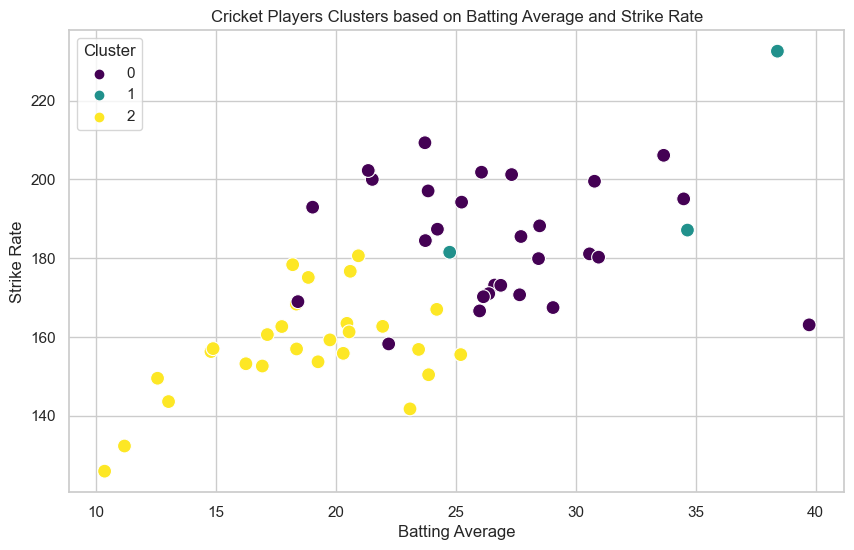

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_death_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_death_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.3
strike_rate_weight = 0.7

# Create a new column for the composite score
filtered_sorted_batting_death_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_death_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 0.6903 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 

In [79]:
predictions

array([[0.23944554],
       [0.23877513],
       [0.43052998],
       [0.26776809],
       [0.15292747],
       [0.27575284],
       [0.33864123],
       [0.12504016],
       [0.61479795],
       [0.28119484],
       [0.4607873 ],
       [0.7447701 ]], dtype=float32)

In [80]:
len(predictions)

12

In [81]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 3ms/step
[[0.3049122 ]
 [0.12504016]
 [0.23944554]
 [0.27575284]
 [0.46879348]
 [0.40311557]
 [0.3490087 ]
 [0.3388301 ]
 [0.11997233]
 [0.29406127]
 [0.43206388]
 [0.2928897 ]
 [0.3379054 ]
 [0.4027386 ]
 [0.3011305 ]
 [0.32188812]
 [0.28119484]
 [0.23187806]
 [0.15292747]
 [0.22997136]
 [0.26776809]
 [0.1736325 ]
 [0.36116087]
 [0.23200764]
 [0.33864123]
 [0.43052998]
 [0.23877513]
 [0.7447701 ]
 [0.92958933]
 [0.5901556 ]
 [0.6127692 ]
 [0.73052436]
 [0.45559523]
 [0.7169806 ]
 [0.67039496]
 [0.6280729 ]
 [0.6854059 ]
 [0.5866945 ]
 [0.35646775]
 [0.58215547]
 [0.54765695]
 [0.6129705 ]
 [0.37150595]
 [0.63996506]
 [0.6160697 ]
 [0.6087588 ]
 [0.7332347 ]
 [0.61479795]
 [0.77869785]
 [0.48341677]
 [0.71667296]
 [0.5606928 ]
 [0.540428  ]
 [0.48836207]
 [0.47349563]
 [0.4764351 ]
 [0.4607873 ]
 [0.49527463]]


In [82]:
len(output_players_performance)

58

In [83]:
filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,KH Pandya,444,273,25,17.760000,162.637363,0.378378,0.256757,2,0.322903
1,R Ashwin,381,288,34,11.205882,132.291667,0.335958,0.204724,2,0.053938
2,KM Jadhav,462,326,20,23.100000,141.717791,0.320346,0.285714,2,0.241012
3,WP Saha,441,281,24,18.375000,156.939502,0.299320,0.231293,2,0.291663
4,SA Yadav,419,232,20,20.950000,180.603448,0.420048,0.329356,2,0.472289
5,RV Uthappa,415,237,22,18.863636,175.105485,0.279518,0.390361,2,0.414703
6,EJG Morgan,404,240,22,18.363636,168.333333,0.227723,0.415842,2,0.364657
7,JP Faulkner,389,238,19,20.473684,163.445378,0.267352,0.323907,2,0.353475
8,PP Chawla,384,305,37,10.378378,125.901639,0.427083,0.171875,2,0.003680
9,SS Tiwary,382,254,16,23.875000,150.393701,0.303665,0.251309,2,0.302278


# Best Batters In the Death

In [84]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_death_df = pd.concat([filtered_sorted_batting_death_df, performance_df], axis=1)
merged_filtered_sorted_batting_death_df = merged_filtered_sorted_batting_death_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_death_df = merged_filtered_sorted_batting_death_df.reset_index(drop=True)
merged_filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,1,1.036712,0.929589
1,CH Gayle,404,196,12,33.666667,206.122449,0.267327,0.519802,0,0.769070,0.778698
2,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,1,0.749985,0.744770
3,KL Rahul,552,283,16,34.500000,195.053004,0.362319,0.326087,0,0.711589,0.733235
4,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984,0,0.708560,0.730524
5,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487,0,0.689707,0.716981
6,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239,0,0.697617,0.716673
7,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732,0,0.668795,0.685406
8,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734,0,0.642647,0.670395
9,RR Pant,534,264,25,21.360000,202.272727,0.359551,0.415730,0,0.623845,0.639965
